# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime

# Impor the OpenWeatherMap API key
from api_keys import api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 637


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + '&q=' + city.replace(" ", "+")
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')

        # Append the City information into city_data list
        city_data.append({"City": city, 
                            "Lat": city_lat, 
                            "Lng": city_lng, 
                            "Max Temp": city_max_temp,
                            "Humidity": city_humidity,
                            "Cloudiness": city_clouds,
                            "Wind Speed": city_wind,
                            "Country": city_country,
                            "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | sao joao da barra
Processing Record 2 of Set 1 | broome
Processing Record 3 of Set 1 | birjand
Processing Record 4 of Set 1 | kapaa
Processing Record 5 of Set 1 | bluff
Processing Record 6 of Set 1 | port augusta
Processing Record 7 of Set 1 | pacific grove
Processing Record 8 of Set 1 | ulladulla
Processing Record 9 of Set 1 | talnakh
Processing Record 10 of Set 1 | bethel
Processing Record 11 of Set 1 | albany
Processing Record 12 of Set 1 | provideniya
Processing Record 13 of Set 1 | namibe
Processing Record 14 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 15 of Set 1 | punta arenas
Processing Record 16 of Set 1 | arraial do cabo
Processing Record 17 of Set 1 | honningsvag
Processing Record 18 of Set 1 | berezovyy
Processing Record 19 of Set 1 | port elizabeth
Processing Record 20 of Set 1 | grenaa
Processing Record 21 of Set 1 | balimo
City not found. Skippin

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          580
Lat           580
Lng           580
Max Temp      580
Humidity      580
Cloudiness    580
Wind Speed    580
Country       580
Date          580
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,sao joao da barra,-21.6403,-41.0511,80.69,86,89,4.47,BR,2023-04-01 22:45:19
1,broome,42.2506,-75.8330,54.70,69,75,18.41,US,2023-04-01 22:45:19
2,birjand,32.8663,59.2211,59.47,26,20,4.61,IR,2023-04-01 22:45:19
3,kapaa,22.0752,-159.3190,75.52,84,100,13.80,US,2023-04-01 22:45:19
4,bluff,-46.6000,168.3333,55.80,67,100,15.59,NZ,2023-04-01 22:45:19


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data_cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data_cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,sao joao da barra,-21.6403,-41.0511,80.69,86,89,4.47,BR,2023-04-01 22:45:19
1,broome,42.2506,-75.8330,54.70,69,75,18.41,US,2023-04-01 22:45:19
2,birjand,32.8663,59.2211,59.47,26,20,4.61,IR,2023-04-01 22:45:19
3,kapaa,22.0752,-159.3190,75.52,84,100,13.80,US,2023-04-01 22:45:19
4,bluff,-46.6000,168.3333,55.80,67,100,15.59,NZ,2023-04-01 22:45:19


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

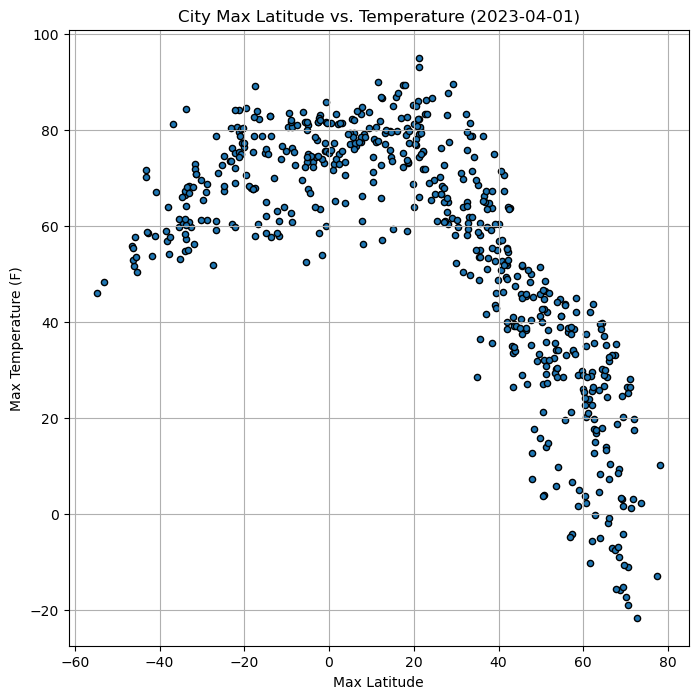

In [23]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot(kind='scatter', x='Lat',y='Max Temp', marker='o', grid=True, figsize=(8,8), edgecolor='black')

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2023-04-01)")
plt.xlabel("Max Latitude")
plt.ylabel("Max Temperature (F)")


# Save the figure
plt.savefig("output_data_Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

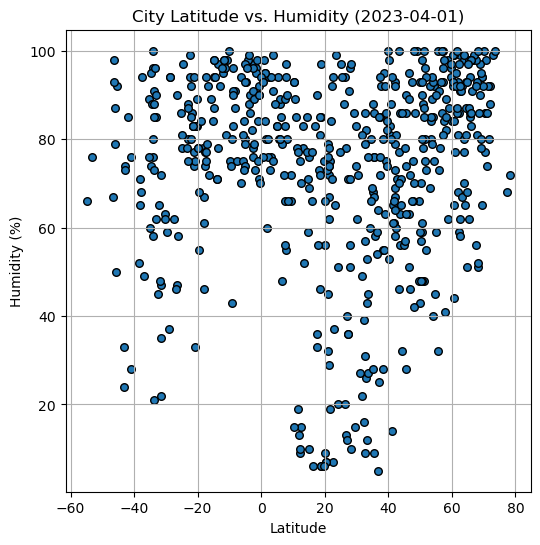

In [24]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot(kind='scatter', x='Lat',y='Humidity', marker='o', grid=True, figsize=(6,6), edgecolor='black', s=30)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2023-04-01)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")


# Save the figure
plt.savefig("output_data_Fig2.png")
# Show plot
plt.show()

#### Latitude Vs. Cloudiness

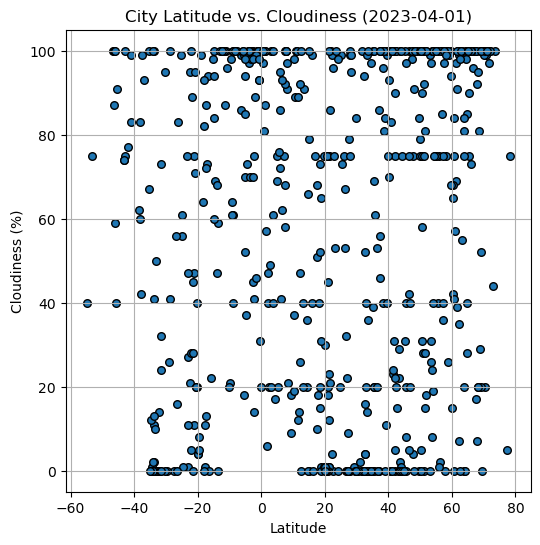

In [25]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot(kind='scatter', x='Lat',y='Cloudiness', marker='o', grid=True, figsize=(6,6), edgecolor='black', s=30)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2023-04-01)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")


# Save the figure
plt.savefig("output_data_Fig3.png")
# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

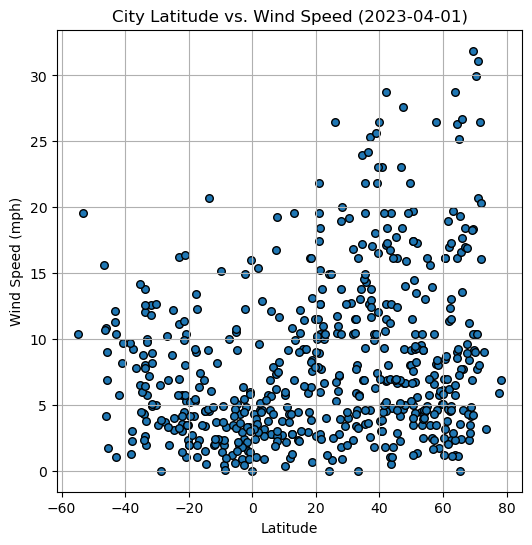

In [26]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot(kind='scatter', x='Lat',y='Wind Speed', marker='o', grid=True, figsize=(6,6), edgecolor='black', s=30)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2023-04-01)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")


# Save the figure
plt.savefig("output_data_Fig4.png")
# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, x_label, y_label, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,broome,42.2506,-75.8330,54.70,69,75,18.41,US,2023-04-01 22:45:19
2,birjand,32.8663,59.2211,59.47,26,20,4.61,IR,2023-04-01 22:45:19
3,kapaa,22.0752,-159.3190,75.52,84,100,13.80,US,2023-04-01 22:45:19
6,pacific grove,36.6177,-121.9166,66.38,64,0,12.66,US,2023-04-01 22:45:19
8,talnakh,69.4865,88.3972,20.21,94,100,18.32,RU,2023-04-01 22:45:19


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,sao joao da barra,-21.6403,-41.0511,80.69,86,89,4.47,BR,2023-04-01 22:45:19
4,bluff,-46.6000,168.3333,55.80,67,100,15.59,NZ,2023-04-01 22:45:19
5,port augusta,-32.5000,137.7667,59.85,45,0,7.18,AU,2023-04-01 22:45:19
7,ulladulla,-35.3500,150.4667,59.77,89,100,6.49,AU,2023-04-01 22:45:19
12,namibe,-15.1961,12.1522,75.18,84,98,6.89,AO,2023-04-01 22:45:20


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.76


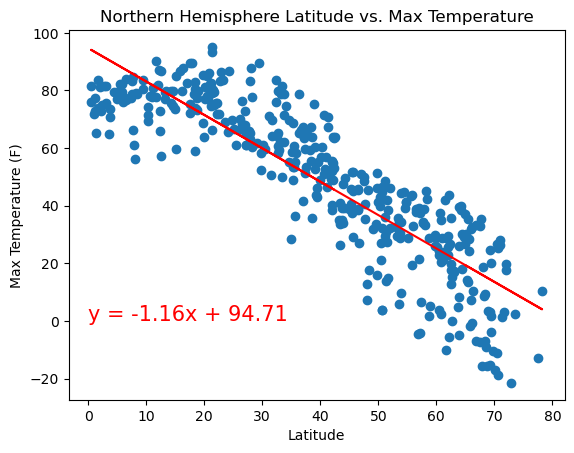

In [15]:
# Define x and y values for the linear regression
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Calculate the regression line "y values" from the slope and intercept
regress_values = x_values * slope + intercept

# Create scatter plot
plt.scatter(x_values, y_values)

# Plot the regression line
plt.plot(x_values, regress_values, "r")
plt.annotate(line_eq,(0,0),fontsize=15,color="red")

# Add labels and title to the plot
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Northern Hemisphere Latitude vs. Max Temperature")
# Print the r-squared value
print(f"The r-squared is: {rvalue**2:.2f}")
plt.show()

The r-squared is: 0.31


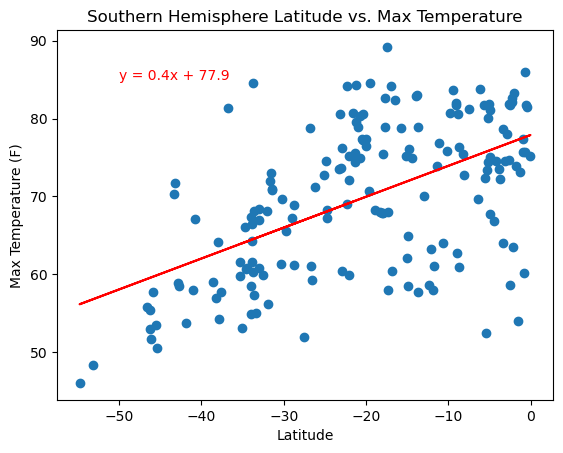

In [27]:
# Define x and y values for the linear regression
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Calculate the regression line "y values" from the slope and intercept
regress_values = x_values * slope + intercept

# Create scatter plot
plt.scatter(x_values, y_values)

# Plot the regression line
plt.plot(x_values, regress_values, "r")
plt.annotate(line_eq,(-50,85),fontsize=10,color="red")

# Add labels and title to the plot
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Southern Hemisphere Latitude vs. Max Temperature")
# Print the r-squared value
print(f"The r-squared is: {rvalue**2:.2f}")
plt.show()

**Discussion about the linear relationship:** CLer inverse relationship. In North, as latitude increase temperatures decrease. South, as latitude increase temperature increase showing a positive correlation compared to norths negative correlation. Overall suggets a strong correlation between latitude and temperature. 

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.07


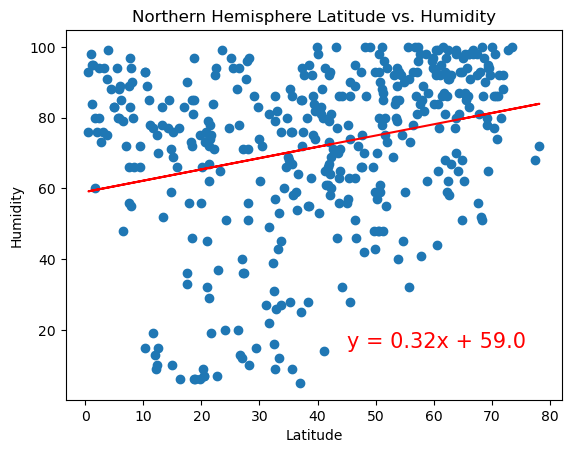

In [17]:
# Define x and y values for the linear regression
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Calculate the regression line "y values" from the slope and intercept
regress_values = x_values * slope + intercept

# Create scatter plot
plt.scatter(x_values, y_values)

# Plot the regression line
plt.plot(x_values, regress_values, "r")
plt.annotate(line_eq,(45,15),fontsize=15,color="red")

# Add labels and title to the plot
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Northern Hemisphere Latitude vs. Humidity")
# Print the r-squared value
print(f"The r-squared is: {rvalue**2:.2f}")
plt.show()

The r-squared is: 0.14


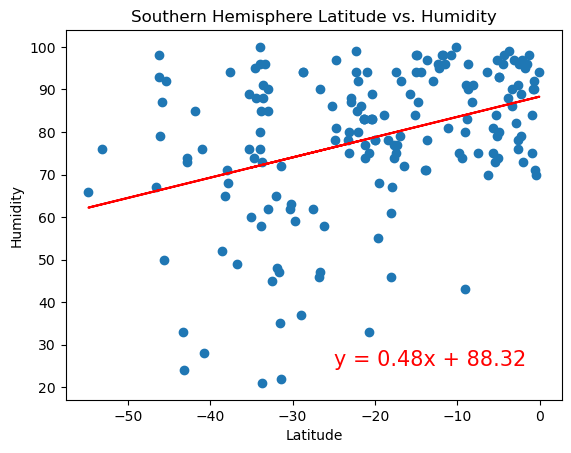

In [29]:
# Define x and y values for the linear regression
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Calculate the regression line "y values" from the slope and intercept
regress_values = x_values * slope + intercept

# Create scatter plot
plt.scatter(x_values, y_values)

# Plot the regression line
plt.plot(x_values, regress_values, "r")
plt.annotate(line_eq,(-25,25),fontsize=15,color="red")

# Add labels and title to the plot
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Southern Hemisphere Latitude vs. Humidity")
# Print the r-squared value
print(f"The r-squared is: {rvalue**2:.2f}")
plt.show()

**Discussion about the linear relationship:** Weak correlation between humidity and latitude in the north, slightly stronger in the south. This suggests that as you get closer to equator humidity tends to increase slightly. Correlations are low, so latitude alone may not be a strong indicator for humidity levels. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.03


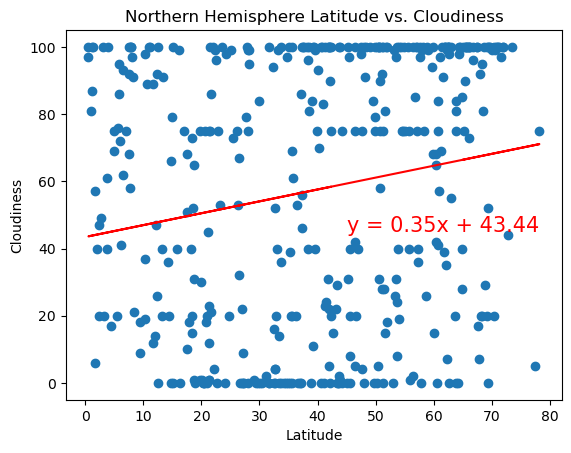

In [31]:
# Define x and y values for the linear regression
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Calculate the regression line "y values" from the slope and intercept
regress_values = x_values * slope + intercept

# Create scatter plot
plt.scatter(x_values, y_values)

# Plot the regression line
plt.plot(x_values, regress_values, "r")
plt.annotate(line_eq,(45,45),fontsize=15,color="red")

# Add labels and title to the plot
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Northern Hemisphere Latitude vs. Cloudiness")
# Print the r-squared value
print(f"The r-squared is: {rvalue**2:.2f}")
plt.show()

The r-squared is: 0.07


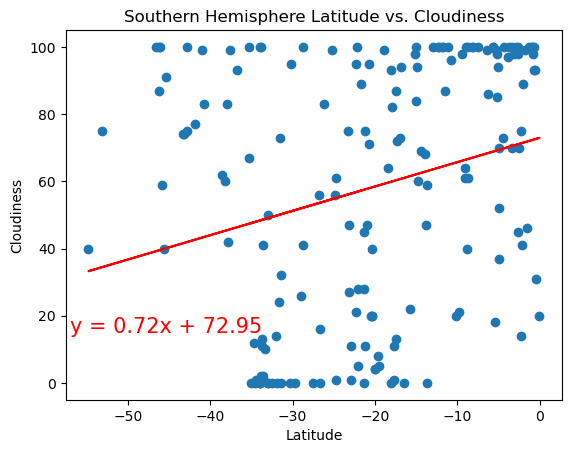

In [32]:
# Define x and y values for the linear regression
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Calculate the regression line "y values" from the slope and intercept
regress_values = x_values * slope + intercept

# Create scatter plot
plt.scatter(x_values, y_values)

# Plot the regression line
plt.plot(x_values, regress_values, "r")
plt.annotate(line_eq,(-57,15),fontsize=15,color="red")

# Add labels and title to the plot
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Southern Hemisphere Latitude vs. Cloudiness")
# Print the r-squared value
print(f"The r-squared is: {rvalue**2:.2f}")
plt.show()

**Discussion about the linear relationship:** Shows weak positive correlations between latitude and cloudiness in general. In Northern, slight increase in cloudiness when latitude increases. Southern, stronger relationship between latitude and cloudiness. Latitude alone may not be the strongest indicator given low r-values. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.03


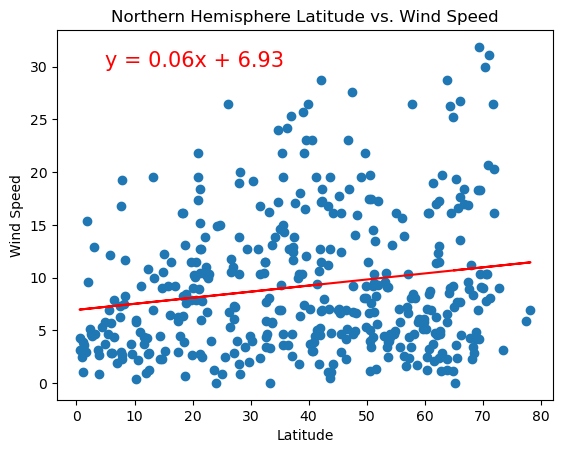

In [33]:
# Define x and y values for the linear regression
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Calculate the regression line "y values" from the slope and intercept
regress_values = x_values * slope + intercept

# Create scatter plot
plt.scatter(x_values, y_values)

# Plot the regression line
plt.plot(x_values, regress_values, "r")
plt.annotate(line_eq,(5,30),fontsize=15,color="red")

# Add labels and title to the plot
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Northern Hemisphere Latitude vs. Wind Speed")
# Print the r-squared value
print(f"The r-squared is: {rvalue**2:.2f}")
plt.show()

The r-squared is: 0.11


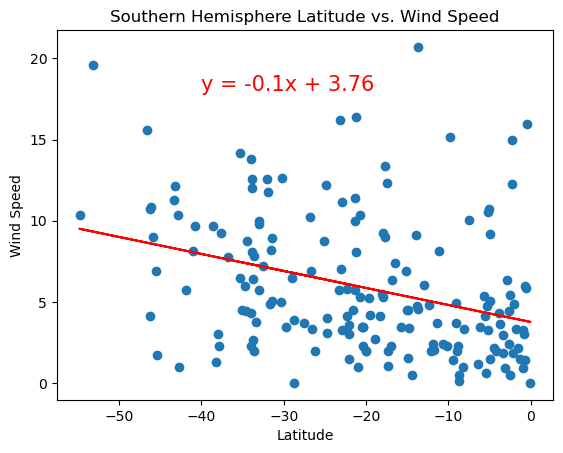

In [34]:
# Define x and y values for the linear regression
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Calculate the regression line "y values" from the slope and intercept
regress_values = x_values * slope + intercept

# Create scatter plot
plt.scatter(x_values, y_values)

# Plot the regression line
plt.plot(x_values, regress_values, "r")
plt.annotate(line_eq,(-40,18),fontsize=15,color="red")

# Add labels and title to the plot
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Southern Hemisphere Latitude vs. Wind Speed")
# Print the r-squared value
print(f"The r-squared is: {rvalue**2:.2f}")
plt.show()

**Discussion about the linear relationship:** There is a weak positive relationship between latitude and wind speed in the Northern Hemisphere and a stronger negative relationship between latitude and wind speed in the Southern Hemisphere.